In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
url = "/content/drive/MyDrive/Colab Notebooks/Dataset/ionosphere_data.csv"
columns = ["Feature_" + str(i) for i in range(34)] + ["Target"]
df = pd.read_csv(url,header=None, names=columns )
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Target
0,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
1,true,false,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
2,true,false,1,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
3,true,false,1,-0.03365,1,0.00485,1,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
4,true,false,1,-0.45161,1,1,0.71216,-1,0,0,...,0.90695,0.51613,1,1,-0.20099,0.25682,1,-0.32382,1,b


In [20]:
df['Target'] = df['Target'].map({'g': 1, 'b': 0})

# Split data into features (X) and target (y)
X = df.drop(columns=['Target'])
y = df['Target']

y = y.fillna(y.mode()[0])
for column in X.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X[column] = label_encoder.fit_transform(X[column])
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89        25
         1.0       0.98      0.89      0.93        46

    accuracy                           0.92        71
   macro avg       0.90      0.93      0.91        71
weighted avg       0.92      0.92      0.92        71

Confusion Matrix:
[[24  1]
 [ 5 41]]
Accuracy Score: 0.9154929577464789


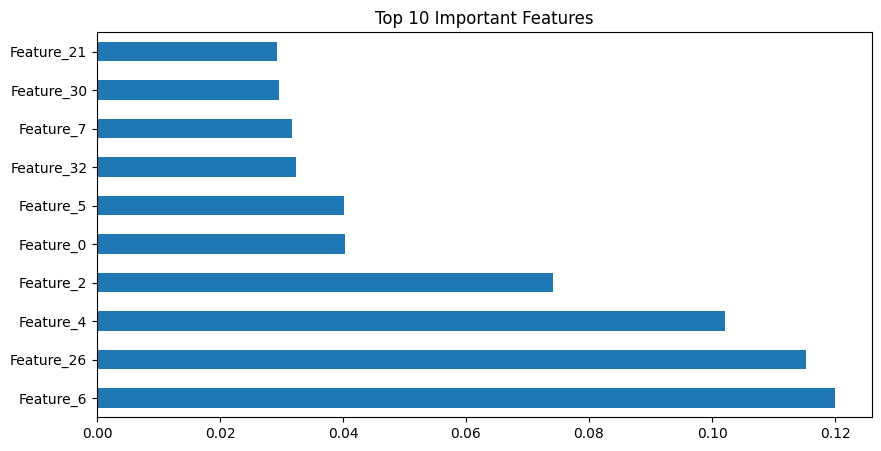

In [21]:

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Visualize feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
